<a href="https://colab.research.google.com/github/iskra3138/ImageSr/blob/master/XAI_%ED%95%99%EC%8A%B5_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TPUs in Colab&nbsp; <a href="https://cloud.google.com/tpu/"><img valign="middle" src="https://raw.githubusercontent.com/GoogleCloudPlatform/tensorflow-without-a-phd/master/tensorflow-rl-pong/images/tpu-hexagon.png" width="50"></a>
In this example, we'll work through training a model to classify images of
flowers on Google's lightning-fast Cloud TPUs. Our model will take as input a photo of a flower and return whether it is a daisy, dandelion, rose, sunflower, or tulip.

We use the Keras framework, new to TPUs in TF 2.1.0. Adapted from [this notebook](https://colab.research.google.com/github/GoogleCloudPlatform/training-data-analyst/blob/master/courses/fast-and-lean-data-science/07_Keras_Flowers_TPU_xception_fine_tuned_best.ipynb) by [Martin Gorner](https://twitter.com/martin_gorner).

#### License

Copyright 2019-2020 Google LLC

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.


---


This is not an official Google product but sample code provided for an educational purpose.


## Enabling and testing the TPU

First, you'll need to enable TPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select TPU from the Hardware Accelerator drop-down

Next, we'll check that we can connect to the TPU:

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

TensorFlow 2.x selected.
Tensorflow version 2.1.0
Running on TPU  ['10.65.147.162:8470']
INFO:tensorflow:Initializing the TPU system: 10.65.147.162:8470


INFO:tensorflow:Initializing the TPU system: 10.65.147.162:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [0]:
import re
import numpy as np
from matplotlib import pyplot as plt

In [0]:
import re

BUCKET = "gs://iskra3138_share"  #@param {type:"string", default:"jddj"}
assert re.search(r'gs://.+', BUCKET), 'For this part, you need a GCS bucket. Head to http://console.cloud.google.com/storage and create one.'

In [0]:
#@title import Grad-CAM Code [Run Me!!]
import cv2

class GradCAM:
  def __init__(self, model, activation_layer):
    self.model = model
    self.activation_layer = activation_layer
    self.tensor_function = self._get_gradcam_tensor_function()

  # get partial tensor graph of CNN model
  def _get_gradcam_tensor_function(self):
    model_input = self.model.input
    y_c = self.model.output
    A_k = self.model.get_layer(self.activation_layer).output

    tensor_function = tf.keras.models.Model([model_input], [A_k, y_c])
    return tensor_function

  # generate Grad-CAM
  def generate(self, input_tensor):
    preds = self.model.predict(input_tensor)[0]
    class_idx = np.argmax(preds)
    
    with tf.GradientTape() as tape:
      conv_outputs, predictions = self.tensor_function(input_tensor) 
      loss = predictions[:, class_idx]

    output = conv_outputs[0]
    
    grads = tape.gradient(loss, conv_outputs)[0]    
    weights = np.mean(grads, axis=(0, 1))
    
    grad_cam = np.dot(output, weights)

    grad_cam = np.maximum(grad_cam, 0)
    grad_cam = cv2.resize(grad_cam, (224, 224))
    return grad_cam, preds, class_idx


## Input data

Our input data is stored on Google Cloud Storage. To more fully use the parallelism TPUs offer us, and to avoid bottlenecking on data transfer, we've stored our input data in TFRecord files, 230 images per file.

Below, we make heavy use of `tf.data.experimental.AUTOTUNE` to optimize different parts of input loading.

All of these techniques are a bit overkill for our (small) dataset, but demonstrate best practices for using TPUs.


In [0]:
import os

AUTO = tf.data.experimental.AUTOTUNE


IMG_WIDTH = 224 #@param {type:"integer"}
IMG_HEIGHT = 224 #@param {type:"integer"}
IMAGE_SIZE =  [IMG_HEIGHT, IMG_WIDTH]

batch_size = 8 * tpu_strategy.num_replicas_in_sync

## 본 실험에서는 16개의 tfrecord파일을 train/validation용으로 나눠서 사용합니다.
## train전용, validation전용 tfrecord 파일들이 있으면 특정해서 list 로 넘기시면 됩니다.
gcs_pattern = os.path.join(BUCKET, '*.tfrec')
validation_split = 0.19
filenames = tf.io.gfile.glob(gcs_pattern)
split = len(filenames) - int(len(filenames) * validation_split)
train_fns = filenames[:split]
validation_fns = filenames[split:]

def parse_tfrecord(example):
    features = {
        "image": tf.io.FixedLenFeature([], tf.string),  # tf.string = bytestring (not text string)
        "file_name": tf.io.FixedLenFeature([], tf.string),  # one bytestring
        "label_name": tf.io.FixedLenFeature([], tf.string),  # one bytestring
        "label": tf.io.FixedLenFeature([], tf.int64),  # shape [] means scalar, one integer
    }
    # decode the TFRecord
    example = tf.io.parse_single_example(example, features)
    
    # FixedLenFeature fields are now ready to use: exmple['size']
    # VarLenFeature fields require additional sparse_to_dense decoding
    
    label = example['label']
    label = tf.one_hot(indices=label,
                      depth=5
                      )   
    image = tf.image.decode_jpeg(example['image'], channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32) ## make [0,255] to [0,1) resize 앞에 위치할 때만 [0,1), 즉 input이 float32가 아니어야 작동
    image = tf.image.resize(image, IMAGE_SIZE) ## method가 tf.image.ResizeMethod.NEAREST_NEIGHBOR 가 아니면 출력은 무조건 float32
    
    #file_name  = example['file_name']
    #label_name  = example['label_name']
    
    return image, label

def load_dataset(filenames):
  # Read from TFRecords. For optimal performance, we interleave reads from multiple files.
  records = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO)
  return records.map(parse_tfrecord, num_parallel_calls=AUTO)

def get_training_dataset():
  dataset = load_dataset(train_fns)

  # Create some additional training images by randomly flipping and
  # increasing/decreasing the saturation of images in the training set. 
  def data_augment(image, label):
    modified = tf.image.random_flip_left_right(image)
    modified = tf.image.random_flip_up_down(modified)
    return modified, label
  augmented = dataset.map(data_augment, num_parallel_calls=AUTO)

  # Prefetch the next batch while training (autotune prefetch buffer size).
  return augmented.repeat().shuffle(2048).batch(batch_size).prefetch(AUTO) 

training_dataset = get_training_dataset()
validation_dataset = load_dataset(validation_fns).batch(batch_size).prefetch(AUTO)

Let's take a peek at the training dataset we've created:

In [0]:
CLASSES = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

def display_one(image, title, subplot, color):
  plt.subplot(subplot)
  plt.axis('off')
  plt.imshow(image)
  plt.title(title, fontsize=16, color=color)
  
# If model is provided, use it to generate predictions.
def display_nine(images, titles, title_colors=None):
  subplot = 331
  plt.figure(figsize=(13,13))
  for i in range(9):
    color = 'black' if title_colors is None else title_colors[i]
    display_one(images[i], titles[i], 331+i, color)
  plt.tight_layout()
  plt.subplots_adjust(wspace=0.1, hspace=0.1)
  plt.show()

def get_dataset_iterator(dataset, n_examples):
  return dataset.unbatch().batch(n_examples).as_numpy_iterator()

training_viz_iterator = get_dataset_iterator(training_dataset, 9)

## Model

모델 compile 시, tf.keras.optimizers api를 쓰면 TPU에서는 학습이 되지 않음
- optimizer='adam' <- w/callback : working
- optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=1e-4) : working
- optimizer=tf.keras.optimizers.Adam(lr=1e-4) : not working

In [0]:
def create_model():
  #pretrained_model = tf.keras.applications.ResNet101(weights='imagenet', input_shape=[*IMAGE_SIZE, 3], include_top=False)
  pretrained_model = tf.keras.applications.Xception(input_shape=[*IMAGE_SIZE, 3], include_top=False)
  pretrained_model.trainable = True
  x = pretrained_model.output
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  predictions = tf.keras.layers.Dense(5, activation='softmax', name='prediction')(x)
  model = tf.keras.Model(inputs=pretrained_model.input, outputs=predictions)
  
  #optimizer='adam',
  #optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=1e-4),
    
  model.compile(
    optimizer='adam',  
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
  )
  return model

with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  model = create_model()
model.summary()
weights = model.get_weights()

83689472/83683744 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
_____________________________

## Training

Calculate the number of images in each dataset. Rather than actually load the data to do so (expensive), we rely on hints in the filename. This is used to calculate the number of batches per epoch.


In [0]:
def count_data_items(filenames):
  # The number of data items is written in the name of the .tfrec files, i.e. flowers00-230.tfrec = 230 data items
  n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
  return np.sum(n)

n_train = count_data_items(train_fns)
n_valid = count_data_items(validation_fns)

train_steps = n_train // batch_size
valid_steps = n_valid // batch_size
#train_steps = count_data_items(train_fns) // batch_size
#valid_steps = count_data_items(validation_fns) // batch_size

print("TRAINING IMAGES: ", n_train, ", STEPS PER EPOCH: ", train_steps)
print("VALIDATION IMAGES: ", n_valid, ", STEPS PER EPOCH: ", valid_steps)

activation_layer = 'block14_sepconv2_act' 

TRAINING IMAGES:  2990 , STEPS PER EPOCH:  46
VALIDATION IMAGES:  680 , STEPS PER EPOCH:  10


Calculate and show a learning rate schedule. We start with a fairly low rate, as we're using a pre-trained model and don't want to undo all the fine work put into training it.

Learning rate per epoch:


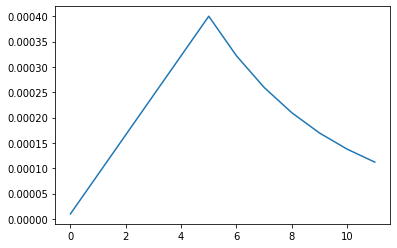

In [0]:
EPOCHS = 12

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005 * tpu_strategy.num_replicas_in_sync
rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
  if epoch < rampup_epochs:
    return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
  elif epoch < rampup_epochs + sustain_epochs:
    return max_lr
  else:
    return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr
    
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=True)

rang = np.arange(EPOCHS)
y = [lrfn(x) for x in rang]
plt.plot(rang, y)
print('Learning rate per epoch:')

GradCAM Test를 위한 Sample Data 만들기

In [0]:
## 5개의 클래스마다 1장씩 샘플링 합니다.
sample_images=[]
sample_labels=[]
for i in range(5):
  def sampling(image, label):
    return tf.math.equal(tf.argmax(label, axis=0), i)
    #return tf.argmax(label, axis=0) == i

  sample_iterator = load_dataset(validation_fns).shuffle(100).filter(sampling).batch(1).as_numpy_iterator()
  image, label = next(sample_iterator)
  for j in range(1):
    sample_images.append(image[j])
    sample_labels.append(label[j])

In [0]:
gradcam_gen = GradCAM(model, activation_layer)

In [0]:
img_tensor = np.expand_dims(sample_images[0], axis=0)
grad, preds, class_idx = gradcam_gen.generate(img_tensor)
print (preds)
print (class_idx)

[0.25304148 0.12271155 0.27046648 0.21035872 0.14342181]
2


,,,,
,,,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

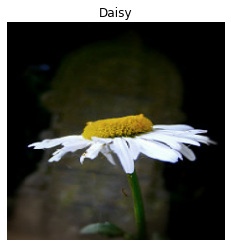

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

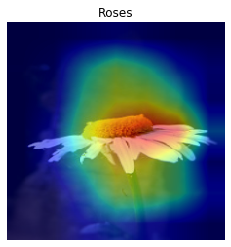

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

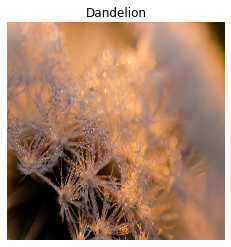

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In [0]:
from google.colab import widgets

grid = widgets.Grid(2, 5, header_row=True, header_column=True)

for n in range (5) :
  with grid.output_to(0, n):
    plt.imshow(sample_images[n])
    plt.title(CLASSES[np.argmax(sample_labels[n])].title())
    plt.axis('off')
  with grid.output_to(1, n):
    img_tensor = np.expand_dims(sample_images[0], axis=0)
    grad, preds, class_idx = gradcam_gen.generate(img_tensor)
    #print (preds)
    
    plt.imshow(sample_images[n])
    plt.imshow(grad, cmap='jet', alpha=0.5)
    plt.title(CLASSES[class_idx].title())
    plt.axis('off')
    

Actually train the model. While the first epoch will be quite a bit slower as we must XLA-compile the execution graph and load the data.

In [0]:
#불러오기
model.set_weights(weights)
model.fit(training_dataset, 
                    steps_per_epoch=train_steps, epochs=1, initial_epoch=0, callbacks=[lr_callback])

### 학습

In [0]:
from google.colab import widgets

model.set_weights(weights)
for i in range(12):
  history = model.fit(training_dataset, validation_data=validation_dataset,
                    steps_per_epoch=train_steps, epochs=i+1, initial_epoch=i, callbacks=[lr_callback])
  #print ('Validation: \n')
  #model.evaluate(validation_dataset)
  
  gradcam_gen = GradCAM(model, activation_layer)
  
  grid = widgets.Grid(2, 5, header_row=True, header_column=True)
  for n in range (5) :
    with grid.output_to(0, n):
      plt.imshow(sample_images[n])
      plt.title(CLASSES[np.argmax(sample_labels[n])].title())
      plt.axis('off')
      
    with grid.output_to(1, n):
      img_tensor = np.expand_dims(sample_images[0], axis=0)
      grad, preds, class_idx = gradcam_gen.generate(img_tensor)
      for i in preds :
        print ("{:.3f}".format(pred), end=', ')
      print ()

      plt.imshow(sample_images[n])
      plt.imshow(grad, cmap='jet', alpha=0.5)
      plt.title(CLASSES[class_idx].title())
      plt.axis('off')

#final_accuracy = history.history["val_accuracy"][-5:]
#print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

In [0]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

Accuracy goes up and loss goes down. Looks good!

## Predictions

Let's look at some our model's predictions next to the original images. We'll show 9 images from the validation set.

In [0]:
def img_title(label, prediction):
  # Both prediction (probabilities) and label (one-hot) are arrays with one item per class.
  class_idx = np.argmax(label, axis=-1)
  prediction_idx = np.argmax(prediction, axis=-1)
  if class_idx == prediction_idx:
    return f'{CLASSES[prediction_idx]} [correct]', 'black'
  else:
    return f'{CLASSES[prediction_idx]} [incorrect, should be {CLASSES[class_idx]}]', 'red'

def get_titles(images, labels, model):
  predictions = model.predict(images)
  titles, colors = [], []
  for label, prediction in zip(classes, predictions):
    title, color = img_title(label, prediction)
    titles.append(title)
    colors.append(color)
  return titles, colors

validation_viz_iterator = get_dataset_iterator(validation_dataset, 9)

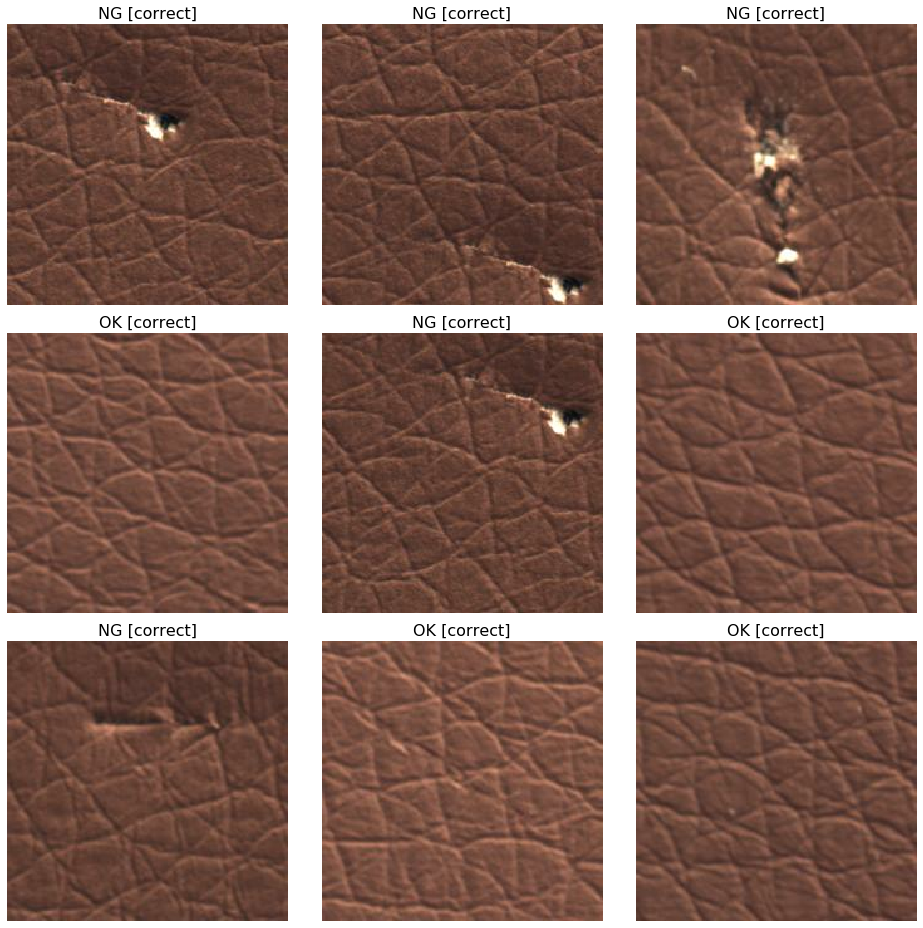

In [0]:
# Re-run this cell to show a new batch of images
images, classes = next(validation_viz_iterator)
titles, colors = get_titles(images, classes, model)
display_nine(images, titles, colors)

## Save and re-loading our trained model

In [0]:
# We can save our model with:
model.save('my_mvtec_tpumodel.h5')
# and reload it with:
reloaded_model = tf.keras.models.load_model('my_mvtec_tpumodel.h5')

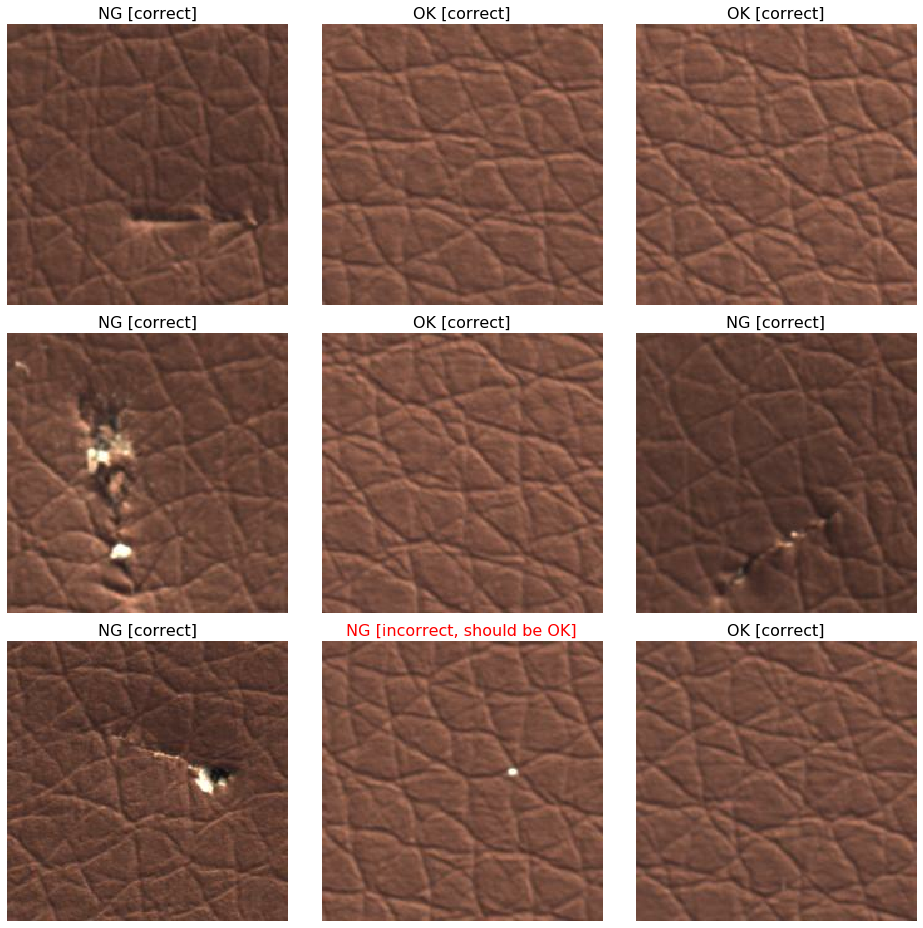

In [0]:
# Re-run this cell to show a new batch of images
images, classes = next(validation_viz_iterator)
titles, colors = get_titles(images, classes, reloaded_model)
display_nine(images, titles, colors)